In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spotipy
from dotenv import load_dotenv
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from spotipy.oauth2 import SpotifyClientCredentials

from music_analysis import REPO_ROOT

# 日本語フォントの設定
mpl.rcParams["font.family"] = "Hiragino Sans"

load_dotenv(REPO_ROOT / ".env")

True

In [3]:
from music_analysis.preprocess.retrieve import TrackRetriever
from music_analysis.preprocess.tables import TrackInfoTable

In [4]:
client_credentials_manager = SpotifyClientCredentials(
    os.environ["SPOTIPY_CLIENT_ID"], os.environ["SPOTIPY_CLIENT_SECRET"]
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [6]:
from dataclasses import dataclass


@dataclass
class Artist:
    name: str
    id: str


artist_ids = [
    "5kVZa4lFUmAQlBogl1fkd6",
    "1S2S00lgLYLGHWA44qGEUs",
    "0hCWVMGGQnRVfDgmhwLIxq",
    "64tJ2EAv1R6UaZqc4iOCyj",
    "1mN9lPKzTRTOop4u7S1Uy9",
    "7k73EtZwoPs516ZxE72KsO",
]


artist_names = [
    "あいみょん",
    "星野源",
    "サカナクション",
    "YOASOBI",
    "iri",
    "ONE OK ROCK",
]

In [8]:
track_retriever = TrackRetriever(sp)

track_info_df = []
for name, id in zip(artist_names, artist_ids):
    artist = Artist(name=name, id=id)
    artist_meta = track_retriever.get_artist_with_id(artist.id)
    artist_albums = track_retriever.glob_artist_albums(artist_meta)

    artist_trks = []
    for artist_album in artist_albums:
        tracks = track_retriever.glob_album_tracks(artist_album)
        artist_trks.extend(tracks)

    track_info_table = TrackInfoTable(sp=sp, tracks=artist_trks)
    df = track_info_table.get_track_info_df()
    # df["年代"] = pl.name
    print(len(df))
    track_info_df.append(df)

track_info_df = pd.concat(track_info_df)
track_info_df

2024-03-15 17:22:38 - music_analysis.preprocess.retrieve - INFO - retrieve:39 - Total albums: 7
2024-03-15 17:22:38 - music_analysis.preprocess.retrieve - INFO - retrieve:51 - AIMYON 弾き語りLIVE 2022 -サーチライト- in 阪神甲子園球場 inclues 19 tracks
2024-03-15 17:22:38 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 1. 憧れてきたんだ - Live in 阪神甲子園球場, 2022.11.05
2024-03-15 17:22:38 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 2. ハルノヒ - Live in 阪神甲子園球場, 2022.11.05
2024-03-15 17:22:38 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 3. ジェニファー - Live in 阪神甲子園球場, 2022.11.05
2024-03-15 17:22:38 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 4. 愛を伝えたいだとか - Live in 阪神甲子園球場, 2022.11.05
2024-03-15 17:22:38 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 5. 3636 - Live in 阪神甲子園球場, 2022.11.05
2024-03-15 17:22:38 - music_analysis.preprocess.retrieve - INFO - retrieve:53 - 6. ら、のはなし - Live in 阪神甲子園球場, 2022.11.05
2024-03-15 17:22:38 - music_analysis.preproce

,トラックID,アーティストID,トラック名,アーティスト名,duration_ms,平均ラウドネス[dB],テンポ(BPM),拍子,キー,長短長,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,曲長[s]
0,1SL6CGZaB86ImPFjLBkzcq,5kVZa4lFUmAQlBogl1fkd6,"憧れてきたんだ - Live in 阪神甲子園球場, 2022.11.05",Aimyon,159613,-8.528,110.800,4,A,Major,0.533,0.621,0.0555,0.050400,0.000035,0.636,0.332,159
1,2iTopxfOmrIayG8kXw3gx3,5kVZa4lFUmAQlBogl1fkd6,"ハルノヒ - Live in 阪神甲子園球場, 2022.11.05",Aimyon,345427,-8.430,207.967,4,A,Major,0.338,0.598,0.0575,0.404000,0.000008,0.753,0.508,345
2,2d2ja3Nc5FhDjbjl94gFOA,5kVZa4lFUmAQlBogl1fkd6,"ジェニファー - Live in 阪神甲子園球場, 2022.11.05",Aimyon,220800,-7.851,202.061,4,F,Major,0.332,0.694,0.0561,0.385000,0.000014,0.852,0.564,220
3,3NFpYIF0vPpqrf1E7UIMzU,5kVZa4lFUmAQlBogl1fkd6,"愛を伝えたいだとか - Live in 阪神甲子園球場, 2022.11.05",Aimyon,259680,-8.592,202.459,4,F♯/G♭,Minor,0.410,0.675,0.1430,0.392000,0.008150,0.707,0.443,259
4,4CMh0kdznyd79OYlLug9Ah,5kVZa4lFUmAQlBogl1fkd6,"3636 - Live in 阪神甲子園球場, 2022.11.05",Aimyon,265880,-9.681,76.963,4,C,Minor,0.609,0.485,0.0363,0.541000,0.000921,0.639,0.630,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2NQ4t1S1c5QlninK1QCnhC,7k73EtZwoPs516ZxE72KsO,Lujo,ONE OK ROCK,248000,-4.150,175.921,4,A,Minor,0.343,0.982,0.1070,0.000087,0.031300,0.312,0.375,248
119,1YVdmLu9PIrV2Bz5sJAUYw,7k73EtZwoPs516ZxE72KsO,ケムリ,ONE OK ROCK,262800,-6.097,125.929,4,C,Major,0.567,0.843,0.0515,0.000348,0.000000,0.128,0.410,262
120,6D6Pybzey0shI8U9ttRAPx,7k73EtZwoPs516ZxE72KsO,欲望に満ちた青年団,ONE OK ROCK,202200,-5.473,87.985,4,B,Major,0.554,0.752,0.0303,0.047900,0.000000,0.364,0.694,202
121,5vYgHcbKyi6gSJ9OEK0Ivb,7k73EtZwoPs516ZxE72KsO,エトセトラ,ONE OK ROCK,274000,-5.750,84.027,4,F♯/G♭,Major,0.456,0.863,0.0614,0.007740,0.000155,0.347,0.147,274


<Axes: xlabel='アーティスト名'>

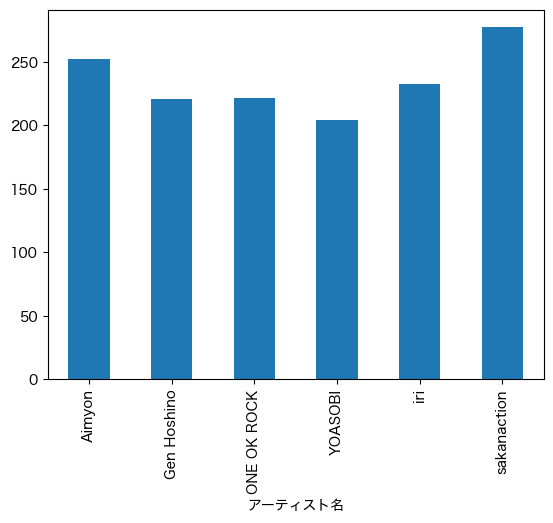

In [9]:
track_info_df.groupby("アーティスト名")["曲長[s]"].mean().plot.bar()

#### 曲数

In [59]:
track_info_df.groupby("アーティスト名").size()

アーティスト名
Aimyon          82
Gen Hoshino     69
ONE OK ROCK    123
YOASOBI         43
iri            103
sakanaction    116
dtype: int64

#### アルバム数

In [61]:
# track_info_df.groupby(["アーティスト名", "アルバム名"]).size()

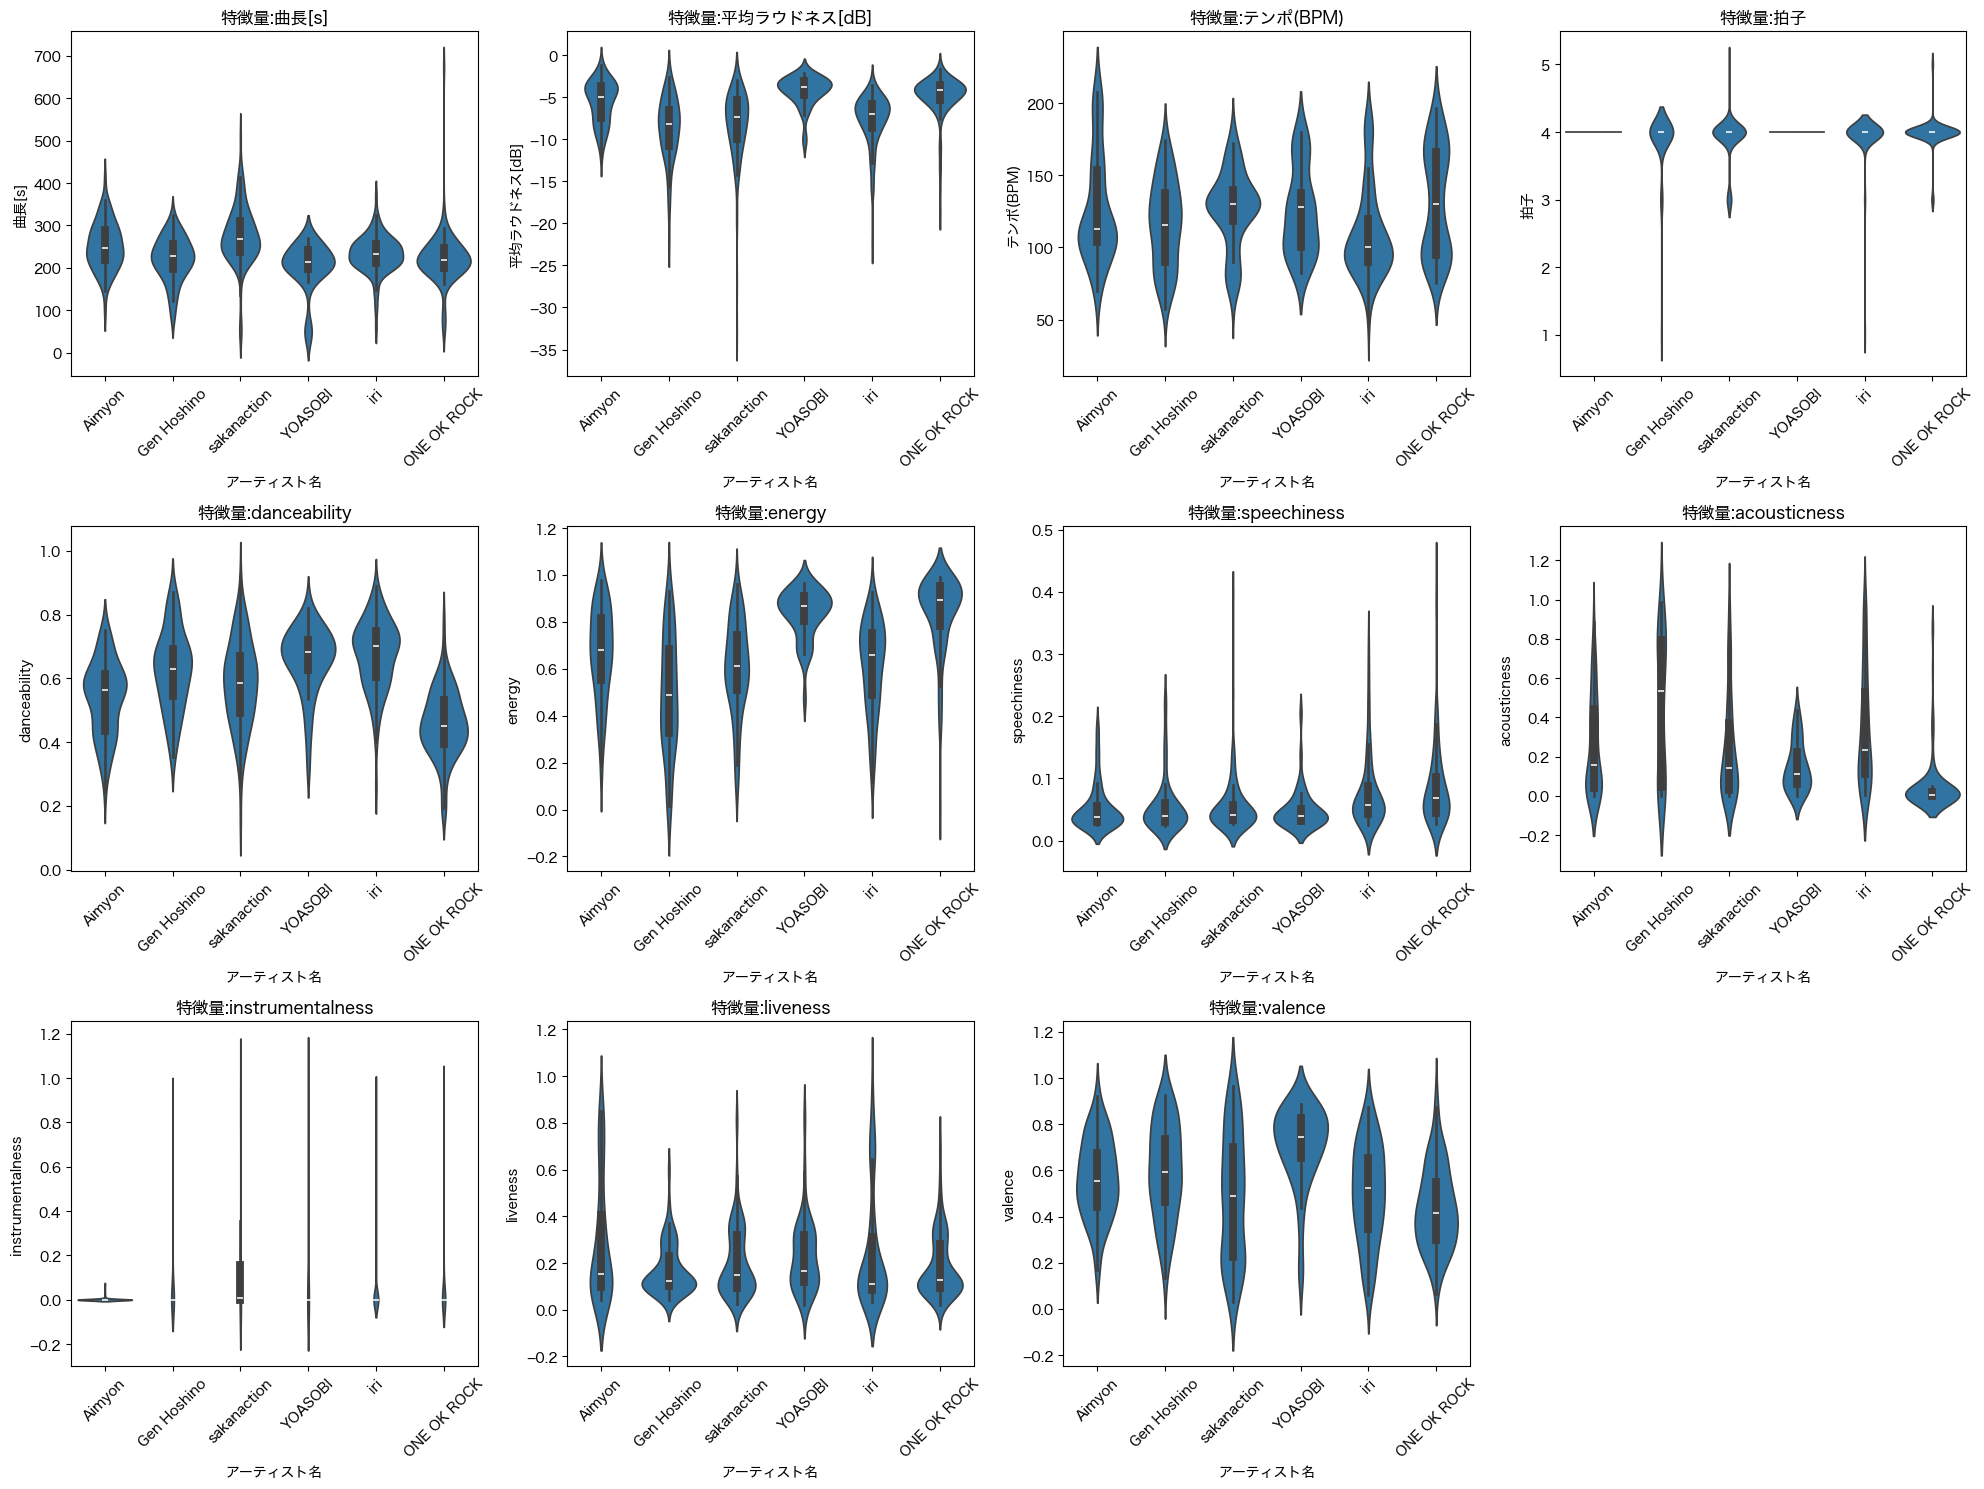

In [58]:
# sns.histplot(
#     track_info_df,
#     x="danceability",
#     hue="アーティスト名",
#     multiple="stack",
# )

feat_cols = [
    "曲長[s]",
    "平均ラウドネス[dB]",
    "テンポ(BPM)",
    "拍子",
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]


def show_violinplot_each_feat(df: pd.DataFrame, x: str, feat_list: list):
    # グリッドができるだけ正方形に近くなるように調整
    ncols = int(np.ceil(np.sqrt(len(feat_list))))
    nrows = int(np.ceil(len(feat_list) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))

    # 1次元配列に変換（サブプロットが1つの場合でも一貫した処理ができるように）
    axes = axes.flatten()

    # 各サブプロットにデータをプロット
    for i in range(len(feat_list)):
        axes[i] = sns.violinplot(df, x=x, y=feat_list[i], ax=axes[i])
        axes[i].tick_params(axis="x", labelrotation=45)
        axes[i].set_title(f"特徴量:{feat_list[i]}")

    # 使用していないサブプロットを非表示にする
    for i in range(len(feat_list), nrows * ncols):
        fig.delaxes(axes[i])

    fig.tight_layout()


show_violinplot_each_feat(track_info_df, x="アーティスト名", feat_list=feat_cols)

In [38]:
cols = [
    # "曲長[s]",
    # "平均ラウドネス[dB]",
    # "テンポ(BPM)",
    # "拍子",
    # "キー",
    # "長短長",
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

In [39]:
# X_reduced = PCA(n_components=2).fit_transform(track_info_df[cols].values)
X_reduced = TSNE(n_components=2).fit_transform(track_info_df[cols].values)

print(X_reduced.shape)

(536, 2)


In [40]:
Y = pd.DataFrame(X_reduced, columns=["第一主成分", "第二主成分"])
# Y["年代"] = track_info_df["年代"].values
Y["アーティスト名"] = track_info_df["アーティスト名"].values
Y["トラック名"] = track_info_df["トラック名"].values
Y["曲長[s]"] = track_info_df["曲長[s]"].values
Y

,第一主成分,第二主成分,アーティスト名,トラック名,曲長[s]
0,7.602319,18.288025,Aimyon,"憧れてきたんだ - Live in 阪神甲子園球場, 2022.11.05",159
1,10.385493,17.215401,Aimyon,"ハルノヒ - Live in 阪神甲子園球場, 2022.11.05",345
2,10.070094,16.752865,Aimyon,"ジェニファー - Live in 阪神甲子園球場, 2022.11.05",220
3,10.953854,16.576269,Aimyon,"愛を伝えたいだとか - Live in 阪神甲子園球場, 2022.11.05",259
4,10.489663,13.269782,Aimyon,"3636 - Live in 阪神甲子園球場, 2022.11.05",265
...,...,...,...,...,...
531,-21.590776,17.370611,ONE OK ROCK,Lujo,248
532,-13.198081,11.048927,ONE OK ROCK,ケムリ,262
533,-15.434671,-4.752897,ONE OK ROCK,欲望に満ちた青年団,202
534,-19.176704,19.737886,ONE OK ROCK,エトセトラ,274


<Axes: xlabel='第一主成分', ylabel='第二主成分'>

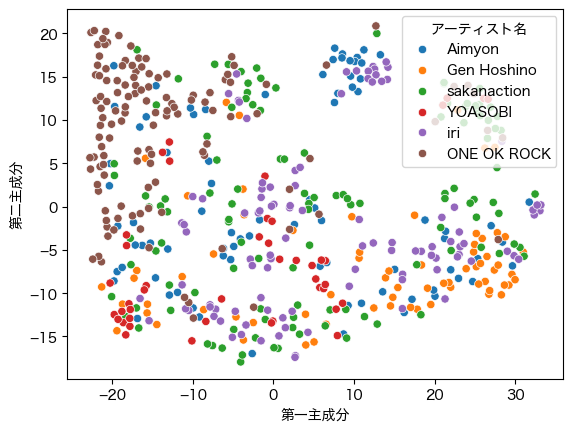

In [41]:
sns.scatterplot(data=Y, x="第一主成分", y="第二主成分", hue="アーティスト名")

In [42]:
import plotly.express as px
import plotly.graph_objects as go

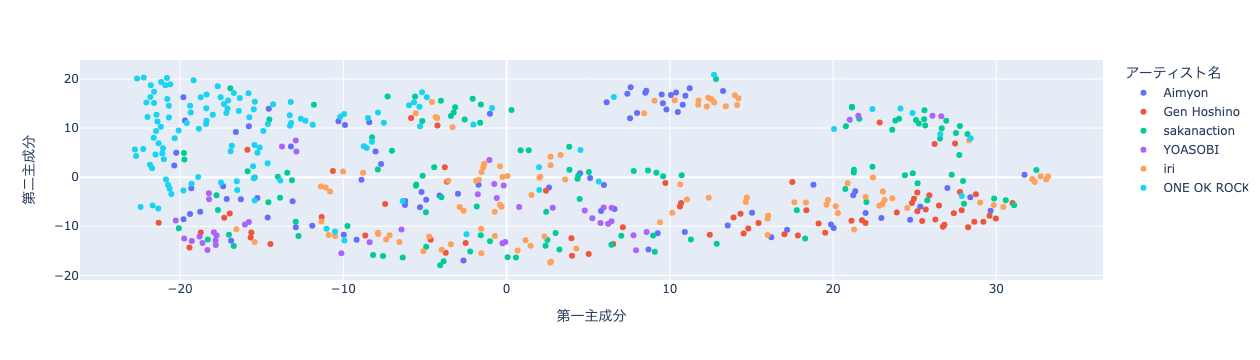

In [43]:
px.scatter(
    Y,
    x="第一主成分",
    y="第二主成分",
    hover_name="アーティスト名",
    hover_data=["アーティスト名", "トラック名", "曲長[s]"],
    color="アーティスト名",
)